# Multiclass classification - single_model using Naive Bayes(sultan)

# Importing and Preprocessing

## Importing libraries

In [1]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import Word
from textblob import TextBlob

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from modAL.models import ActiveLearner
from modAL.models import ActiveLearner

import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline

# Gathering required features

In [2]:
df = pd.read_pickle("./sultan_features.pkl")
df = df.fillna(0)

In [3]:
df

,question_id,question,ref_answer,student_answer,grade,qn_modified,ref_modified,student_modified,student_demoted,ref_demoted,...,embed_ref,embed_stud,aligned,aligned_demoted,embed_ref_demoted,embed_stud_demoted,cos_similarity,cos_similarity_demo,aligned_score,aligned_score_demo
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,what role prototype program in problem solving,to simulate behaviour portion desired software...,high risk problem address in prototype program...,high risk address make sure that feasible may ...,simulate behaviour portion desired software pr...,...,"[[0.13071777343750002, -0.10377929687499998, 0...","[[-0.5155224609375, 0.008998413085937518, 1.30...","[[software, software]]","[[software, software]]","[[0.12071777343750001, -0.11377929687499999, 0...","[[-0.42614746, -0.44728088, 1.0943298, 1.98028...",0.591084,0.549007,0.044444,0.080000
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,what role prototype program in problem solving,to simulate behaviour portion desired software...,to simulate portion desired final product quic...,simulate portion desired final product quick a...,simulate behaviour portion desired software pr...,...,"[[0.13071777343750002, -0.10377929687499998, 0...","[[2.15602783203125, 0.4706297302246094, 0.2766...","[[to, to], [simulate, simulate], [portion, por...","[[portion, portion], [desired, desired], [simu...","[[0.12071777343750001, -0.11377929687499999, 0...","[[1.87479736328125, 0.3003001403808594, -0.136...",0.616971,0.634849,0.192308,0.258065
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,what role prototype program in problem solving,to simulate behaviour portion desired software...,prototype program simulates behavior portion d...,simulates behavior portion desired software pr...,simulate behaviour portion desired software pr...,...,"[[0.13071777343750002, -0.10377929687499998, 0...","[[-0.28229736328125, 0.043576965332031245, 0.2...","[[portion, portion], [desired, desired], [soft...","[[portion, portion], [desired, desired], [soft...","[[0.12071777343750001, -0.11377929687499999, 0...","[[-0.1350708, -0.15441132, 0.1538086, 0.227294...",0.816475,0.812660,0.413793,0.800000
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,what role prototype program in problem solving,to simulate behaviour portion desired software...,defined in specification phase prototype stimu...,defined specification phase stimulates behavio...,simulate behaviour portion desired software pr...,...,"[[0.13071777343750002, -0.10377929687499998, 0...","[[-0.127725830078125, 0.53630615234375, 0.3706...","[[portion, portion], [desired, desired], [soft...","[[portion, portion], [desired, desired], [soft...","[[0.12071777343750001, -0.11377929687499999, 0...","[[-0.3446045, -0.018371582, 0.34469604, 1.6362...",0.692453,0.715080,0.196078,0.416667
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,what role prototype program in problem solving,to simulate behaviour portion desired software...,it used to let user first idea completed progr...,it used let user first idea completed and allo...,simulate behaviour portion desired software pr...,...,"[[0.13071777343750002, -0.10377929687499998, 0...","[[0.23586181640625004, 0.06217674255371097, 0....","[[software, software], [product, generate]]","[[software, software], [product, generate]]","[[0.12071777343750001, -0.11377929687499999, 0...","[[0.38285400390625, -0.15020606994628904, 0.43...",0.658722,0.661856,0.081633,0.

In [3]:
short_df = df[['question_id','question','student_answer','student_modified','ref_modified', \
               'grade','length_ratio','aligned_score','aligned_score_demo','cos_similarity','cos_similarity_demo']]
short_df['grades_round']= short_df['grade'].apply(lambda x: round(x))

/home/mohandass/anaconda3/envs/maluuba/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Sultan features

In [57]:
X = short_df[['length_ratio','aligned_score','aligned_score_demo','cos_similarity','cos_similarity_demo']]
# X[X<0] = 0
Y = short_df['grade'].values
X = np.array(X)

In [45]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
#training data
y_true= clf.predict(X_train)
mean_squared_error(y_true, Y_train)

0.8992931861480923

In [47]:
#testing data
y_true= clf.predict(X_test)
mean_squared_error(y_true, Y_test)


0.9281314890114738

In [51]:
#Overall data
y_true= clf.predict(X)
mean_squared_error(y_true, Y)

0.9050679322988676

In [60]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error

# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
msq =0.0
for i in range(1000):
    clf = Ridge(alpha=1.0)
    clf.fit(X, Y)
    #Overall data
    y_true= clf.predict(X)
    msq += mean_squared_error(y_true, Y)

print("Mean squared error average for 1000 times:",msq/1000.0)

Mean squared error average for 1000 times: 0.9029530099957447


In [62]:
#getting the seed index
classes = short_df['grade'].unique()
seed_index = []
for i in classes:
    seed_index.append(short_df['grade'][short_df['grade']==i].index[0])
# seed_index

In [63]:
act_data = short_df.copy()
accuracy_list = []

# initialising
train_idx = seed_index
X_train = X[train_idx]
y_train = Y[train_idx]
 
# generating the pool
X_pool = np.delete(X, train_idx, axis=0)
y_pool = np.delete(Y, train_idx)

act_data = act_data.drop(axis=0,index = train_idx)
act_data.reset_index(drop = True,inplace=True)


# initializing the active learner
# lr = LogisticRegression()
# nb = MultinomialNB()
clf = Ridge(alpha=1.0)
learner = ActiveLearner(
#     estimator = lr,
    estimator = clf,
#     estimator = RandomForestClassifier(n_estimators=5),
#     estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

# pool-based sampling
n_queries = int(len(X)/6)
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
#     print("\nQ: ", act_data.loc[int(query_idx),'question'])
#     print("A: ",act_data.loc[int(query_idx),'student_answer'])
#     print("Actual grade: ",y_pool[query_idx].reshape(1, ))
#     print ("Class probabilities: ",learner.predict_proba(X_pool[query_idx].reshape(1, -1)))
#     human_label = int(input("\nGive me a grade 0 or 1:"))
    
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    
    act_data = act_data.drop(axis=0,index = query_idx)
    act_data.reset_index(drop=True, inplace=True)
    
#     accuracy_list.append(learner.score(X,Y))
    print('MSQ after query no. %d: %f' % (idx+1,mean_squared_error(clf.predict(X_pool), y_pool)))
print("======================================")
# print("By just labelling ",round(n_queries*100.0/len(X),2),"% of total data accuracy of ", round(learner.score(X_pool, y_pool),3), " % is achieved on the unseen data"  )

AttributeError: 'Ridge' object has no attribute 'predict_proba'

#  Text classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import Word
from textblob import TextBlob

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from modAL.models import ActiveLearner
from modAL.models import ActiveLearner

import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline

In [4]:
original_data = pd.read_csv('../dataset/mohler2_cleaned.csv',dtype = {'question_number':str})
original_data = original_data.drop(labels='Unnamed: 0', axis=1)
original_data = original_data.rename(columns={'question_number':'question_id','question_text':'question','answer_model':'ref_answer','answer_student':'student_answer','score_avg':'grade'})

FileNotFoundError: File b'../dataset/mohler2_cleaned.csv' does not exist

In [ ]:
short_df['status'] = short_df['status'].astype(int)

#normalising to avoid negative values
short_df['cos_similarity'] = short_df['cos_similarity'].apply(lambda x: x+1)
short_df['cos_similarity_demo'] = short_df['cos_similarity_demo'].apply(lambda x: x+1)
short_df['cos_similarity'] = short_df['cos_similarity'].apply(lambda x: x/np.sum(short_df['cos_similarity'].values))
short_df['cos_similarity_demo'] = short_df['cos_similarity_demo'].apply(lambda x: x/np.sum(short_df['cos_similarity_demo'].values))

short_df['length_ratio'] = short_df['length_ratio'].apply(lambda x: x/np.sum(short_df['length_ratio'].values))
short_df['aligned_score'] = short_df['aligned_score'].apply(lambda x: x/np.sum(short_df['aligned_score'].values))
short_df['aligned_score_demo'] = short_df['aligned_score_demo'].apply(lambda x: x/np.sum(short_df['aligned_score_demo'].values))



In [3]:
df = original_data.copy()

#converting to lower case
df['ref_modified'] = df['ref_answer'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['student_modified'] = df['student_answer'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#punctuation removal
df['ref_modified'] = df['ref_modified'].str.replace('[^\w\s]','')
df['student_modified'] = df['student_modified'].str.replace('[^\w\s]','')

#stop word removal
stop = stopwords.words('english')
df['ref_modified'] = df['ref_modified'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['student_modified'] = df['student_modified'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


#lemmatisation
df['ref_modified'] = df['ref_modified'].apply(lambda x: " ".join([Word(word).lemmatize() for word in word_tokenize(x)]))
df['student_modified'] = df['student_modified'].apply(lambda x: " ".join([Word(word).lemmatize() for word in word_tokenize(x)]))

In [4]:
short_df = df[['student_answer','student_modified','grade']]

In [5]:
short_df.head()
short_df = df[['question_id','student_answer','student_modified', 'grade','question']]
df['grades_round']= short_df['grade'].apply(lambda x: round(x))


## Class counts

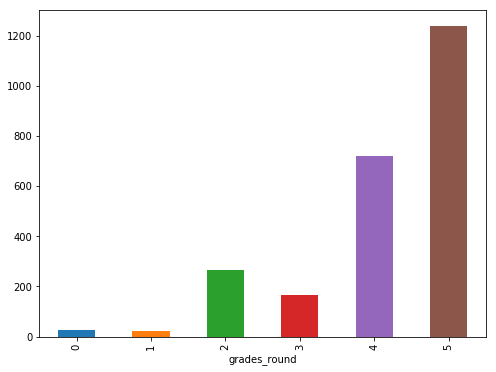

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('grades_round').student_modified.count().plot.bar(ylim=0)
plt.show()

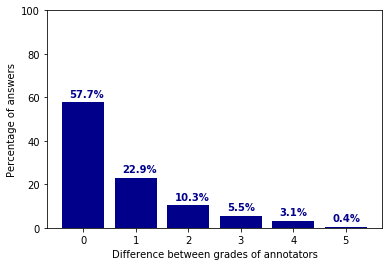

In [66]:
# y = df.groupby('grades_round').student_modified.count().values
# x = df.groupby('grades_round').student_modified.count().index
y


y = np.array([57.7,22.9,10.3,5.5,3.1,0.4])
x = df.groupby('grades_round').student_modified.count().index

for i, v in enumerate(y):
    plt.text(i - .26, v + 2.5, str(v)+'%', color='darkblue', fontweight='bold')
    
plt.xlabel('Difference between grades of annotators', fontsize=10)
plt.ylim([0,100])
plt.ylabel('Percentage of answers',fontsize=10)  
plt.bar(x,y,color="darkblue")
plt.savefig('test.png', dpi=300, format='png', bbox_inches='tight') # use format='svg'

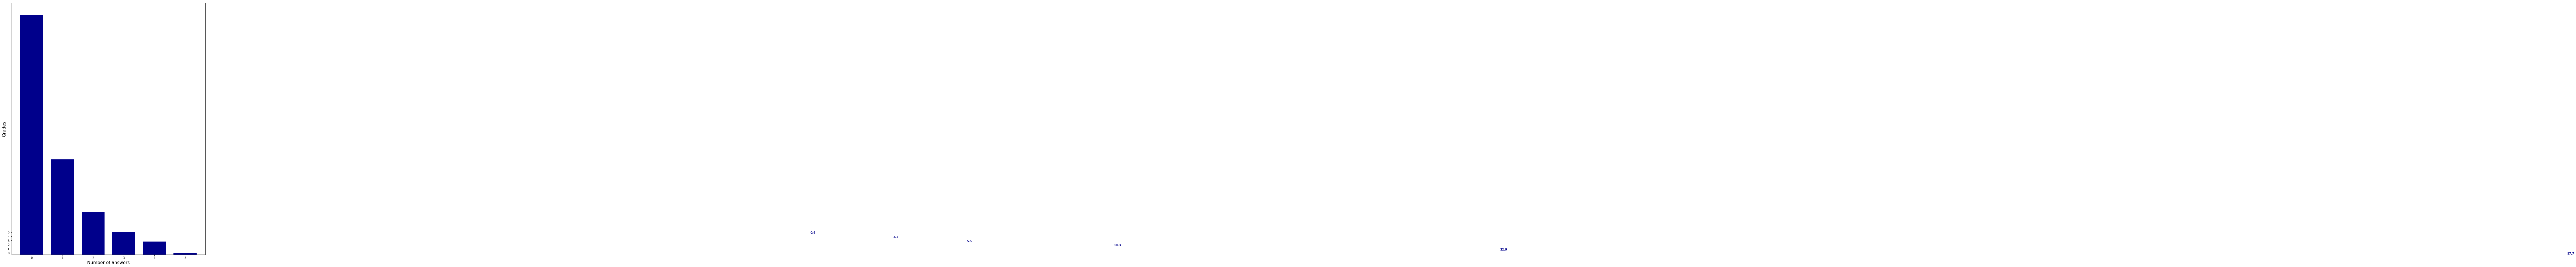

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt

# x = [u'INFO', u'CUISINE', u'TYPE_OF_PLACE', u'DRINK', u'PLACE', u'MEAL_TIME', u'DISH', u'NEIGHBOURHOOD']
# y = [160, 167, 137, 18, 120, 36, 155, 130]


fig, ax = plt.subplots(figsize=(12,16))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.bar(ind, y, width, color="darkblue")
for i, v in enumerate(y):
    ax.text(v + 25, i + .02, str(v), color='darkblue', fontweight='bold')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
# plt.title('title')
plt.xlabel('Number of answers', fontsize=15)
# plt.xlim([0,80])
plt.ylabel('Grades',fontsize=15)      
#plt.show()
plt.savefig('test.png', dpi=300, format='png', bbox_inches='tight') # use format='svg' 

## Text Representation

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.student_modified).toarray()
labels = df.grades_round
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(short_df['grade'].items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '0':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '3':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '4':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '5':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '6':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '7':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '8':
  . Most correlated unigrams:
. furthest
. zero
  . Most c

# '70':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '71':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '72':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '73':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '74':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '75':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '76':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '77':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '78':
  . Most correlated unigrams

# '150':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '151':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '152':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '153':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '154':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '155':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '156':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '157':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '158':
  . Most correlated unigrams:
. queue
. pus

# '229':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '230':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '231':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '232':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '233':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '234':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '235':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '236':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '237':
  . Most correlated unigrams:
. queue
. push

# '303':
  . Most correlated unigrams:
. error
. compilation
  . Most correlated bigrams:
. multidimensional array
. compilation error
# '304':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '305':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '306':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '307':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '308':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '309':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '310':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '311':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams

# '375':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '376':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '377':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '378':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '379':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '380':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '381':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '382':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '383':
  . Most correlated unigrams:

# '450':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '451':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '452':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '453':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '454':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '455':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '456':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '457':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '458':
  . Most correlated unigrams:
. queue
. push
  . Most correlated 

# '527':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '528':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '529':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '530':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '531':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '532':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '533':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '534':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '535':
  . Most correlat

# '608':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '609':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '610':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '611':
  . Most correlated unigrams:
. answer
. answered
  . Most correlated bigrams:
. member data
. function change
# '612':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '613':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '614':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '615':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '616':
  . Most correlated unigrams:
. elaboration
. divided
  . Most 

# '680':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '681':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '682':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '683':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '684':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '685':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '686':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '687':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '688':
  . Most

# '755':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '756':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '757':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '758':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '759':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '760':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '761':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '762':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '763':
  . Most correlated unigrams

# '833':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '834':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '835':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '836':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '837':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '838':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '839':
  . Most correlated unigrams:
. error
. compilation
  . Most correlated bigrams:
. multidimensional array
. compilation error
# '840':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '841':
  . Most correlated unigrams:
. queue
. push
  . Most cor

# '911':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '912':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '913':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '914':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '915':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '916':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '917':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '918':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '919':
  . Most correlated unigrams:
. furthest
. zero

# '985':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '986':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '987':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '988':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '989':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '990':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '991':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '992':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '993':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated big

# '1053':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1054':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1055':
  . Most correlated unigrams:
. error
. compilation
  . Most correlated bigrams:
. multidimensional array
. compilation error
# '1056':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1057':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1058':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1059':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1060':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer

# '1127':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1128':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1129':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1130':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1131':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1132':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1133':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1134':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1135':
  . Most correlated unigrams:
. furthest
. zero

# '1204':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1205':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1206':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1207':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1208':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1209':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1210':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1211':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1212':
  . Most correlated unigrams:
. furthest
. zero
  . M

# '1274':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1275':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1276':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1277':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1278':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1279':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1280':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1281':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1282':
  . M

# '1350':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1351':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1352':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1353':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1354':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1355':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1356':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1357':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1358':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue de

# '1418':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1419':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1420':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1421':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1422':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1423':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '1424':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1425':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1426':
  . Most correlated unigrams:
. queue
. pus

# '1498':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1499':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1500':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1501':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1502':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1503':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1504':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1505':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1506':
  . Most corre

# '1573':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1574':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1575':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1576':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1577':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1578':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1579':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1580':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '1581'

# '1651':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1652':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1653':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1654':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1655':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1656':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1657':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1658':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1659':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. functio

# '1726':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1727':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1728':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1729':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1730':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1731':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1732':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1733':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1734':
  . Most correlated unigrams:
. furthest
. z

# '1796':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1797':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1798':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1799':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1800':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1801':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1802':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1803':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1804':
  . Most

# '1875':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1876':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1877':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1878':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1879':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1880':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1881':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1882':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1883':
  . Most correlated unigrams:

# '1953':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '1954':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1955':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '1956':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1957':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '1958':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1959':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1960':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '1961':
  . Most correlated unigrams:
. queue
. push
  . M

# '2026':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '2027':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2028':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2029':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2030':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2031':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2032':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2033':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2034':
  . Most correlated unigrams:
. queue
. push
  . Most correlated 

# '2104':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2105':
  . Most correlated unigrams:
. maintenance
. push
  . Most correlated bigrams:
. maintenance verification
. multiplied lrb
# '2106':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2107':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2108':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2109':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2110':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2111':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2112':
  

# '2184':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2185':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2186':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2187':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2188':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2189':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '2190':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2191':
  . Most correlated unigrams:
. answer
. answered
  . Most correlated bigrams:
. member data
. function change
# '2192':
  . Most correlated unigrams:
. furthest
. zero
  . Most correl

# '2257':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2258':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2259':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2260':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2261':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '2262':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2263':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2264':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2265':
  . Most correlated unigra

# '2336':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2337':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2338':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2339':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2340':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2341':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2342':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2343':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2344':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. e

# '2413':
  . Most correlated unigrams:
. input
. create
  . Most correlated bigrams:
. parent child
. input parameter
# '2414':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2415':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2416':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2417':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2418':
  . Most correlated unigrams:
. furthest
. zero
  . Most correlated bigrams:
. function pointer
. function type
# '2419':
  . Most correlated unigrams:
. queue
. push
  . Most correlated bigrams:
. enqueue dequeue
. push pop
# '2420':
  . Most correlated unigrams:
. elaboration
. divided
  . Most correlated bigrams:
. reference pointer
. rrb rrb
# '2421':
  . Most correlated unigrams:
. elaboration
. divided
  . Mos

# NB classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['student_modified'], df['grades_round'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = LogisticRegression().fit(X_train_tfidf, y_train)

# Model Evaluation

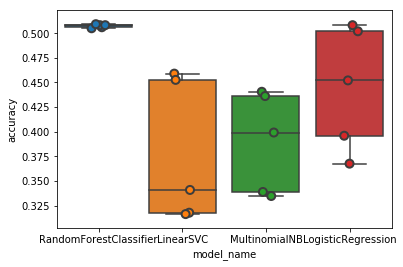

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [12]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.377320
LogisticRegression        0.445179
MultinomialNB             0.389895
RandomForestClassifier    0.507376
Name: accuracy, dtype: float64

In [13]:
print(clf.predict(count_vect.transform([""])))

[5]


In [43]:
import spacy
nlp = spacy.load('en')
tweet_doc = nlp("Here goes your some input text")
print (tweet_doc.vector)

[ 1.36031497e+00  8.44026983e-01 -9.02708530e-01  1.87690449e+00
 -5.70998676e-02 -4.01886195e-01 -5.43617420e-02  3.64132337e-02
 -1.73629224e-01  1.00428927e+00 -4.55065042e-01 -3.38734239e-01
  1.44613647e+00 -1.44188309e+00 -1.45589697e+00 -6.65893078e-01
 -1.94043636e+00  3.98687750e-01 -1.65569627e+00  1.64144561e-01
  2.17862058e+00  1.53032684e+00  5.31333864e-01  1.17947352e+00
  9.28386748e-01 -7.56080627e-01 -1.27940679e+00  2.46980980e-01
 -1.43916380e+00 -7.04576254e-01 -3.95085029e-02  1.57321918e+00
 -4.58088249e-01  3.61883640e-03  4.07574326e-01  1.84461832e-01
  1.96150100e+00 -5.59419632e-01  6.10034823e-01 -4.12704557e-01
 -9.82024670e-01  5.03803551e-01  6.30805790e-01 -1.77445567e+00
  2.28564069e-01 -5.51879227e-01  2.72676855e-01 -8.30997050e-01
 -5.86838543e-01  9.04333293e-01  1.08496952e+00 -2.15854716e+00
 -6.26835644e-01  5.56043684e-01 -5.27386367e-01  2.91983426e-01
  1.56867695e+00  2.47949696e+00 -1.75087869e+00 -2.19080493e-01
  5.13380647e-01  1.45292

In [7]:
df1 = pd.read_csv("../dataset/Semeval_dataset/train_semeval.csv")
df2 = pd.read_csv("../dataset/Semeval_dataset/test1_semeval.csv")
df3 = pd.read_csv("../dataset/Semeval_dataset/test2_semeval.csv")
df4 = pd.read_csv("../dataset/Semeval_dataset/test3_semeval.csv")

In [8]:
len(df1)

4969

In [9]:
len(df2)

540

In [10]:
len(df3)

4562

In [11]:
len(df4)

733